In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

<Figure size 432x288 with 0 Axes>

In [2]:
x_arr = np.loadtxt('x_arr_vts13.txt')                                      #all elements are in micron
y_arr = np.loadtxt('y_arr_vts13.txt')                                       #all elements are in micron
z_arr = np.loadtxt('z_arr_vts13.txt')                                       #all elements are in micron
t_arr = np.loadtxt('dt_arr_vts13.txt')

In [3]:
dt_min=1e-9                                                                   #initial time step
dt_max=1e-2                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_zarr=[]                                                                    #mean squared y

msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 40    
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt

timelaglog

array([1.00000000e-09, 1.51177507e-09, 2.28546386e-09, 3.45510729e-09,
       5.22334507e-09, 7.89652287e-09, 1.19377664e-08, 1.80472177e-08,
       2.72833338e-08, 4.12462638e-08, 6.23550734e-08, 9.42668455e-08,
       1.42510267e-07, 2.15443469e-07, 3.25702066e-07, 4.92388263e-07,
       7.44380301e-07, 1.12533558e-06, 1.70125428e-06, 2.57191381e-06,
       3.88815518e-06, 5.87801607e-06, 8.88623816e-06, 1.34339933e-05,
       2.03091762e-05, 3.07029063e-05, 4.64158883e-05, 7.01703829e-05,
       1.06081836e-04, 1.60371874e-04, 2.42446202e-04, 3.66524124e-04,
       5.54102033e-04, 8.37677640e-04, 1.26638017e-03, 1.91448198e-03,
       2.89426612e-03, 4.37547938e-03, 6.61474064e-03, 1.00000000e-02])

In [4]:
np.sqrt(timelaglog[0]*timelaglog[0+1])

1.2295426265956216e-09

In [5]:
#from numba import jit
#@jit(nopython=True)

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    z=0
    w=0
    count=0                                                                  
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       
            if timelag >= timelaglog[m]:
                if timelag <= timelaglog[m+1]:
                    x = x+((x_arr[j]-x_arr[i])**2)
                    y = y+((y_arr[j]-y_arr[i])**2)
                    z = z+((z_arr[j]-z_arr[i])**2)
                    count = count+1
                else:
                    break;
            else:
                break;  
                
    x=float(x/count)
    y=float(y/count)
    z=float(z/count)
    r=float(x+y+z) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                         
    msd_zarr.append(z)
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    counterarray.append(count)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [6]:
msd_xarr=np.array(msd_xarr)
msd_yarr=np.array(msd_yarr)                                                         
msd_zarr=np.array(msd_zarr)

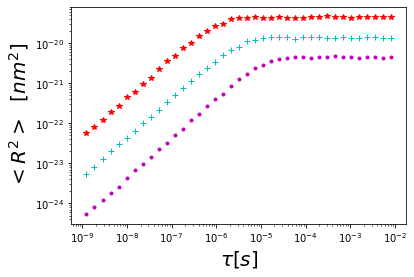

In [7]:


plt.plot(mean_t_arr,msd_xarr,'r*')
plt.plot(mean_t_arr,msd_yarr,'c+')
plt.plot(mean_t_arr,msd_zarr,'m.')

plt.ylabel(r'$<R^2> \ \  [nm^2]$',size=20)
plt.xlabel(r'$\tau [s]$', size =20)


plt.xscale('log')
plt.yscale('log')

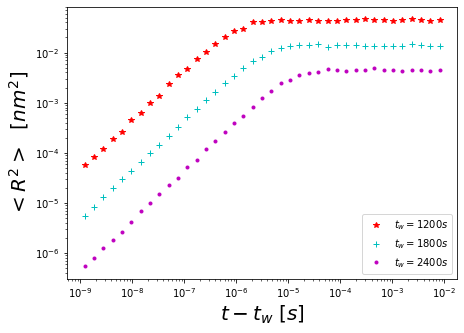

In [8]:
from pylab import rcParams
rcParams ['figure.figsize']=7,5

plt.plot(mean_t_arr,msd_xarr*1e18,'r*', label=r'$t_w = 1200 s$')
plt.plot(mean_t_arr,msd_yarr*1e18,'c+', label=r'$t_w = 1800 s$')
plt.plot(mean_t_arr,msd_zarr*1e18,'m.', label=r'$t_w = 2400 s$')

plt.ylabel(r'$<R^2> \ \  [nm^2]$',size=20)
plt.xlabel(r'$t -t_w \ [s]$', size =20)
plt.legend(loc="lower right")
plt.xscale('log')
plt.yscale('log')
plt.show()

In [9]:
'''import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_iso.csv", df_a_tp, delimiter=",")'''

'import numpy\na = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])\nindex = [\'time\', \'msd_r\', \'msd_x\', \'msd_y\']\n\nimport pandas as pd\ndf_a = pd.DataFrame(a, index)\ndf_a_tp = pd.DataFrame.transpose(df_a)\n\nnumpy.savetxt("mvm_vts_iso.csv", df_a_tp, delimiter=",")'

In [9]:
alpha = log(10)/1200
beta = 0#log(10)/1200

In [10]:
time0=1200
time1=1800
time2=2400

In [11]:
n=len(mean_t_arr)

In [12]:
mean_t_arr0=mean_t_arr+(np.ones(n)*time0)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr0)))
e_tw =(exp(-(alpha-beta)*time0))*np.ones(n)
ett_mean_t_arr0 = (1.0/(alpha - beta))*(e_tw - e_t)

In [13]:
ett_mean_t_arr0

array([1.22966217e-10, 1.85866887e-10, 2.81009845e-10, 4.24827233e-10,
       6.42242093e-10, 9.70906591e-10, 1.46778355e-09, 2.21898983e-09,
       3.35460837e-09, 5.07141984e-09, 7.66682284e-09, 1.15905170e-08,
       1.75222375e-08, 2.64896946e-08, 4.00464705e-08, 6.05412329e-08,
       9.15247273e-08, 1.38364825e-07, 2.09176470e-07, 3.16227762e-07,
       4.78065248e-07, 7.22727127e-07, 1.09260084e-06, 1.65176672e-06,
       2.49709973e-06, 3.77505308e-06, 5.70703101e-06, 8.62774697e-06,
       1.30432122e-05, 1.97184018e-05, 2.98097854e-05, 4.50656839e-05,
       6.81291624e-05, 1.02995935e-04, 1.55706608e-04, 2.35393188e-04,
       3.55861142e-04, 5.37981064e-04, 8.13304212e-04])

In [14]:
mean_t_arr1=mean_t_arr+(np.ones(n)*time1)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr1)))
e_tw =(exp(-(alpha-beta)*time1))*np.ones(n)
ett_mean_t_arr1 = (1.0/(alpha - beta))*(e_tw - e_t)

In [15]:
ett_mean_t_arr1

array([3.88852997e-11, 5.87854024e-11, 8.88651869e-11, 1.34342870e-10,
       2.03094597e-10, 3.07028606e-10, 4.64153712e-10, 7.01707346e-10,
       1.06082048e-09, 1.60372479e-09, 2.42446028e-09, 3.66524235e-09,
       5.54101960e-09, 8.37677880e-09, 1.26638062e-08, 1.91448209e-08,
       2.89426616e-08, 4.37548002e-08, 6.61474061e-08, 1.00000001e-07,
       1.51177507e-07, 2.28546387e-07, 3.45510725e-07, 5.22334500e-07,
       7.89652271e-07, 1.19377660e-06, 1.80472167e-06, 2.72833315e-06,
       4.12462587e-06, 6.23550616e-06, 9.42668185e-06, 1.42510205e-05,
       2.15443328e-05, 3.25701744e-05, 4.92387528e-05, 7.44378620e-05,
       1.12533174e-04, 1.70124550e-04, 2.57189374e-04])

In [16]:
mean_t_arr2=mean_t_arr+(np.ones(n)*time2)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr2)))
e_tw =(exp(-(alpha-beta)*time2))*np.ones(n)
ett_mean_t_arr2 = (1.0/(alpha - beta))*(e_tw - e_t)

In [17]:
ett_mean_t_arr2

array([1.22978874e-11, 1.85892200e-11, 2.81008037e-11, 4.24825425e-11,
       6.42242093e-11, 9.70930096e-11, 1.46778174e-10, 2.21898078e-10,
       3.35455774e-10, 5.07137102e-10, 7.66681923e-10, 1.15904899e-09,
       1.75222158e-09, 2.64897199e-09, 4.00464614e-09, 6.05412347e-09,
       9.15247508e-09, 1.38364776e-08, 2.09176460e-08, 3.16227784e-08,
       4.78065242e-08, 7.22727123e-08, 1.09260084e-07, 1.65176674e-07,
       2.49709973e-07, 3.77505306e-07, 5.70703101e-07, 8.62774699e-07,
       1.30432122e-06, 1.97184018e-06, 2.98097854e-06, 4.50656839e-06,
       6.81291624e-06, 1.02995935e-05, 1.55706608e-05, 2.35393188e-05,
       3.55861142e-05, 5.37981064e-05, 8.13304212e-05])

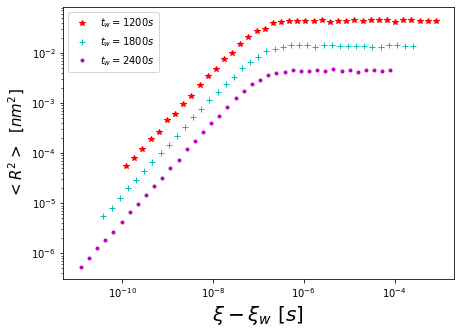

In [18]:
from pylab import rcParams
rcParams ['figure.figsize']=7,5


plt.plot(ett_mean_t_arr0,msd_xarr*(1e18),'r*', label=r'$t_w = 1200 s$')
plt.plot(ett_mean_t_arr1,msd_yarr*(1e18),'c+', label=r'$t_w = 1800 s$')
plt.plot(ett_mean_t_arr2,msd_zarr*(1e18),'m.', label=r'$t_w = 2400 s$')

plt.ylabel(r'$<R^2> \ \  [nm^2]$',size=15)
plt.xlabel(r'$\xi-\xi_w\ [s] $',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')
plt.legend(loc="upper left")
plt.show()

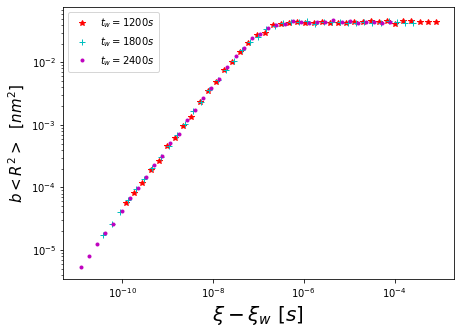

In [21]:
from pylab import rcParams
rcParams ['figure.figsize']=7,5


plt.plot(ett_mean_t_arr0,msd_xarr*(1*1e18),'r*', label=r'$t_w = 1200 s$')
plt.plot(ett_mean_t_arr1,msd_yarr*(3.16*1e18),'c+', label=r'$t_w = 1800 s$')
plt.plot(ett_mean_t_arr2,msd_zarr*(10*1e18),'m.', label=r'$t_w = 2400 s$')

plt.ylabel(r'$b<R^2> \ \  [nm^2]$',size=15)
plt.xlabel(r'$\xi-\xi_w\ [s] $',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')
plt.legend(loc="upper left")
plt.show()

